In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


# **Data Generation - Achieve Data**

In [ ]:
# Connect drive to colab to get the test & train dataset
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/CV Group Project/DATASET'

Mounted at /content/drive


## **Train Data**

In [ ]:
import mediapipe as mp
import cv2
import os
from google.colab.patches import cv2_imshow
import math
import numpy as np
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

train_downdog_file = []
train_goddess_file=[]
train_plank_file = []
train_tree_file = []
train_warrior2_file = []

with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/downdog') as entries:
    for entry in entries:
        train_downdog = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/downdog/'+entry.name)
        train_downdog_file.append(train_downdog)

with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/goddess') as entries:
    for entry in entries:
        train_goddess = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/goddess/'+entry.name)
        train_goddess_file.append(train_goddess)


with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/plank') as entries:
    for entry in entries:
        train_plank = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/plank/'+entry.name)
        train_plank_file.append(train_plank)


with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/tree') as entries:
    for entry in entries:
        train_tree = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/tree/'+entry.name)
        train_tree_file.append(train_tree)

with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/warrior2') as entries:
    for entry in entries:
        train_warrior2 = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TRAIN/warrior2/'+entry.name)
        train_warrior2_file.append(train_warrior2)

## **Test Data**

In [ ]:
test_downdog_file = []
test_goddess_file=[]
test_plank_file = []
test_tree_file = []
test_warrior2_file = []

with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TEST/downdog') as entries:
    for entry in entries:
        test_downdog = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TEST/downdog/'+entry.name)
        test_downdog_file.append(test_downdog)

with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TEST/goddess') as entries:
    for entry in entries:
        test_goddess = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TEST/goddess/'+entry.name)
        test_goddess_file.append(test_goddess)


with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TEST/plank') as entries:
    for entry in entries:
        test_plank = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TEST/plank/'+entry.name)
        test_plank_file.append(test_plank)


with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TEST/tree') as entries:
    for entry in entries:
        test_tree = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TEST/tree/'+entry.name)
        test_tree_file.append(test_tree)

with os.scandir('/content/drive/MyDrive/CV Group Project/DATASET/TEST/warrior2') as entries:
    for entry in entries:
        test_warrior2 = cv2.imread('/content/drive/MyDrive/CV Group Project/DATASET/TEST/warrior2/'+entry.name)
        test_warrior2_file.append(test_warrior2)

# **Data Clean Up - Only get necessary segmentation**

In [ ]:
def md_enable_segmentation(image):
  with mp_pose.Pose( static_image_mode=True, min_detection_confidence=0.50,model_complexity=2, enable_segmentation=True) as pose:
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    if results.segmentation_mask is not None:
      segm_2class = 0.2 + 0.8 * results.segmentation_mask
      segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
      annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
      img_some = annotated_image
      annotated_image= cv2.normalize(annotated_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
  return annotated_image


In [ ]:
def clean_im(im_list):
  for i in range(0, len(im_list)):
    im_list[i] = md_enable_segmentation(im_list[i])
  return im_list

In [ ]:
train_downdog = []
train_goddess = []
train_plank = []
train_tree = []
train_warrior2 = []
test_downdog = []
test_goddess = []
test_plank = []
test_tree = []
test_warrior2 = []

train_downdog = clean_im(train_downdog_file)
train_goddess = clean_im(train_goddess_file)
train_plank = clean_im(train_plank_file)
train_tree = clean_im(train_tree_file)
train_warrior2 = clean_im(train_warrior2_file)
test_downdog = clean_im(test_downdog_file)
test_goddess = clean_im(test_goddess_file)
test_plank = clean_im(test_plank_file)
test_tree = clean_im(test_tree_file)
test_warrior2 = clean_im(test_warrior2_file)

# **Data Finalize - Make train & test data dictionary**

In [ ]:
def calculate_angle(a,b,c): 
  a = np.array(a)
  b = np.array(b)
  c = np.array(c)

  radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
  angle = np.abs(radians*180/np.pi)

  if angle > 180.0: 
    angle = 360-angle

  return angle

In [ ]:
def making_dictionary(t_dict, IMAGE_FILES, p_label):
  with mp_pose.Pose(
      static_image_mode=True,
      model_complexity=2,
      enable_segmentation=True,
      min_detection_confidence=0.5) as pose:
    for idx,image in enumerate(IMAGE_FILES):
      joints_xy = [[] for _ in range(66)]
      image_height, image_width, _ = image.shape
      # Convert the BGR image to RGB before processing.
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if not results.pose_landmarks:
        continue
      for i in range(0,33): 
        joints_xy[2*i].append(results.pose_landmarks.landmark[i].x)
        joints_xy[2*i+1].append(results.pose_landmarks.landmark[i].y)

      left_shoulder =  [joints_xy[22], joints_xy[23]]
      right_shoulder = [joints_xy[24], joints_xy[25]]
      left_elbow = [joints_xy[26], joints_xy[27]]
      right_elbow = [joints_xy[28], joints_xy[29]]
      left_wrist = [joints_xy[30], joints_xy[31]]
      right_wrist = [joints_xy[32], joints_xy[33]]
      left_index = [joints_xy[38], joints_xy[39]]
      right_index = [joints_xy[40], joints_xy[41]]
      left_hip = [joints_xy[46], joints_xy[47]]
      right_hip = [joints_xy[48], joints_xy[49]]
      left_knee = [joints_xy[50], joints_xy[51]]
      right_knee = [joints_xy[52], joints_xy[53]]
      left_ankle = [joints_xy[54], joints_xy[55]]
      right_ankle = [joints_xy[56], joints_xy[57]]
      left_foot_index = [joints_xy[62], joints_xy[63]]
      right_foot_index = [joints_xy[64], joints_xy[65]]

      LShoulder_angle = calculate_angle(right_shoulder, left_shoulder, left_elbow) #LShoulder_angle
      RShoulder_angle = calculate_angle(left_shoulder, right_shoulder, right_elbow) #RShoulder_angle
      LElbow_angle= calculate_angle(left_shoulder, left_elbow, left_wrist) #LElbow_angle
      RElbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist) #RElbow_angle
      LWrist_angle = calculate_angle(left_elbow, left_wrist, left_index) #LWrist_angle
      RWrist_angle = calculate_angle(right_elbow, right_wrist, right_index) #RWrist_angle
      LHip_angle = calculate_angle(left_shoulder, left_hip, left_knee) #LHip_angle
      RHip_angle = calculate_angle(right_shoulder, right_hip, right_knee) #RHip_angle
      LKnee_angle = calculate_angle(left_hip, left_knee, left_ankle) #LKnee_angle
      RKnee_angle = calculate_angle(right_hip, right_knee, right_ankle) #RKnee_angle
      LAnkle_angle = calculate_angle(left_knee, left_ankle, left_foot_index) #LAnkle_angle
      RAnkle_angle  = calculate_angle(right_knee, right_ankle, right_foot_index) #RAnkle_angle

      in_arr = [round(LShoulder_angle[0],2),round(RShoulder_angle[0],2),round(LElbow_angle[0],2),round(RElbow_angle[0],2),round(LWrist_angle[0],2)
              ,round(RWrist_angle[0],2),round(LHip_angle[0],2),round(RHip_angle[0],2),round(LKnee_angle[0],2),round(RKnee_angle[0],2),round(LAnkle_angle[0],2),round(RAnkle_angle[0],2)]
      t_dict.update({str(in_arr):p_label})
  return t_dict

## **Train Data Dictionary**

In [ ]:
#Make dictionary for the future input of classifiers
train_dict = dict()
train_dict = making_dictionary(train_dict, train_downdog, 'downdog')
train_dict = making_dictionary(train_dict, train_goddess, 'goddess')
train_dict = making_dictionary(train_dict, train_plank, 'plank')
train_dict = making_dictionary(train_dict, train_tree, 'tree')
train_dict = making_dictionary(train_dict, train_warrior2, 'warrior2')

## **Test Data Dictionary**

In [ ]:
test_dict = dict()
test_dict = making_dictionary(test_dict, test_downdog, 'downdog')
test_dict = making_dictionary(test_dict, test_goddess, 'goddess')
test_dict = making_dictionary(test_dict, test_plank, 'plank')
test_dict = making_dictionary(test_dict, test_tree, 'tree')
test_dict = making_dictionary(test_dict, test_warrior2, 'warrior2')

#**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
x_train = list(train_dict.keys())
x_test = list(test_dict.keys())
y_train = list(train_dict.values())
y_test = list(test_dict.values())

In [ ]:
for i in range(0, len(x_train)):
  x_train[i] = x_train[i].strip('][').split(', ')
  for j in range(0, len(x_train[i])):
    x_train[i][j] = float(x_train[i][j])

for i in range(0, len(x_test)):
  x_test[i] = x_test[i].strip('][').split(', ')
  for j in range(0, len(x_test[i])):
    x_test[i][j] = float(x_test[i][j])

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(x_train)
X_testscaled=sc_X.transform(x_test)

0.9812332439678284
Accuracy: 0.98
Precision: 0.98


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


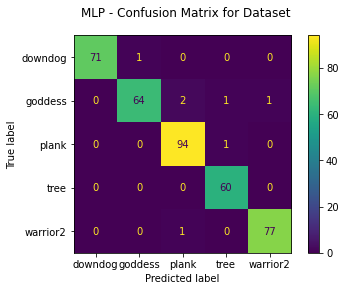

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='micro')))
fig = plot_confusion_matrix(clf, X_testscaled, y_test, display_labels=clf.classes_)
fig.figure_.suptitle("MLP - Confusion Matrix for Dataset")
plt.show()

#**Logistic Regression Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.91
Precision: 0.91


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Logistic Regression - Confusion Matrix for Dataset')

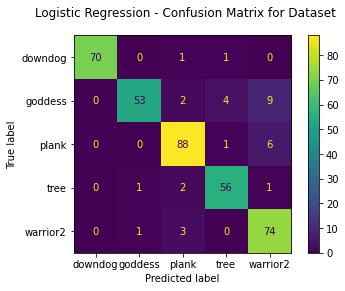

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='micro')))
fig = plot_confusion_matrix(model, x_test, y_test, display_labels=model.classes_)
fig.figure_.suptitle("Logistic Regression - Confusion Matrix for Dataset")

#**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

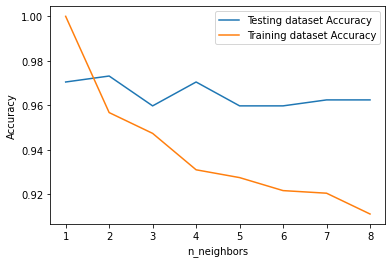

In [ ]:
it_num = np.arange(1, 9)
train_accuracy = np.empty(len(it_num))
test_accuracy = np.empty(len(it_num))
  
# Loop over K values
for i, k in enumerate(it_num):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(it_num, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(it_num, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### **Compare neighbor=2 and 4**

Accuracy: 0.97
Precision: 0.97


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'KNN(k=2) - Confusion Matrix for Dataset')

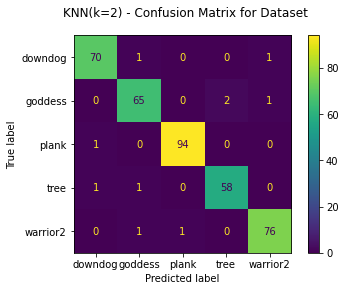

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(x_train, y_train)

y_pred = knn_2.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='micro')))
fig = plot_confusion_matrix(knn_2, x_test, y_test, display_labels=model.classes_)
fig.figure_.suptitle("KNN(k=2) - Confusion Matrix for Dataset")

Accuracy: 0.97
Precision: 0.97


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'KNN(k=4) - Confusion Matrix for Dataset')

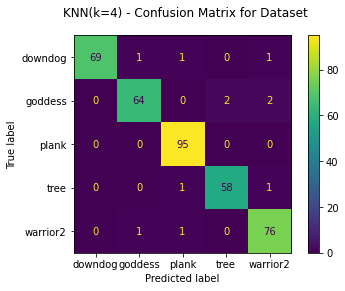

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(x_train, y_train)

y_pred = knn_4.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='micro')))
fig = plot_confusion_matrix(knn_4, x_test, y_test, display_labels=model.classes_)
fig.figure_.suptitle("KNN(k=4) - Confusion Matrix for Dataset")